<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/%EC%82%BC%EC%84%B1%EC%B9%B4%EB%93%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (1) 한글 깨짐 방지 
- 밑 세 개 코드 치고, 런타임 모두 돌린다
- 코드가 아직 깨지는 것 확인
- 런타임 다시 시작 누르고, 첫 번째 코드 제외 이후 셀 런타임 실행한다

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [157]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

In [158]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

### (2) 필요 라이브러리 불러오기

In [414]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

import math
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

### (3) 삼성카드 데이터 불러오기
- 구글 드라이브에 저장된 데이터를 불러온다. 

In [415]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
from os.path import join

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)  

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [416]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/


In [417]:
%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive
'Colab Notebooks'/    new_data_1905.csv   new_data2020.csv   trend_w_demo.csv
 data.csv             new_data_2004.csv   Python/
'Machine Learning'/   new_data_2005.csv   samsung_dataset/
 new_data_1904.csv    new_data2019.csv    SQL/


- 한글 목차로 되어있어 깨짐 현상이 나오는데, encoding='CP949'를 더해 풀어준다. 

In [418]:
data= pd.read_csv("trend_w_demo.csv", encoding='CP949')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low


In [419]:
data['기혼스코어']

0         high
1         high
2          mid
3          mid
4         high
          ... 
452033     low
452034    high
452035    high
452036    high
452037    high
Name: 기혼스코어, Length: 452038, dtype: object

In [420]:
data.columns

Index(['YM', 'Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어'],
      dtype='object')

In [421]:
columns_to_change=['기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어']

- 기혼스코어, 유아자녀스코어, 초등학생자녀스코어, 중고생자녀스코어, 대학생자녀스코어, 전업주부스코어 

확률 숫자로 변환하기
  + high : 3
  + mid : 2
  + low : 1

In [422]:
for col in columns_to_change:
  data[col].replace(to_replace="high", value="3", inplace=True)
  data[col].replace(to_replace="mid", value="2", inplace=True)
  data[col].replace(to_replace="low", value="1", inplace=True)
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,3,1,3,2,1,1
1,202005,취미,0,B,3,1,2,2,1,1
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2
3,202005,뷰티,0,D,2,2,2,2,1,1
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1


- 어떤 카테고리가 있는지 확인

In [423]:
data["Category"].unique()

array(['할인점', '취미', '오픈마켓/소셜', '뷰티', '디저트', '전문몰', '항공/여행사', '종합몰',
       '호텔/숙박', '면세점'], dtype=object)

In [424]:
data_2019= data[(data['YM']==201905) | (data['YM']==201904)]
data_2020= data[(data['YM']==202005) | (data['YM']==202004)]

### (4) 데이터 시각화 

#### 1. 카테고리별 결제 순위 

In [425]:
cat_summary=data.groupby('Category').count()["연령대"].sort_values(ascending=False)

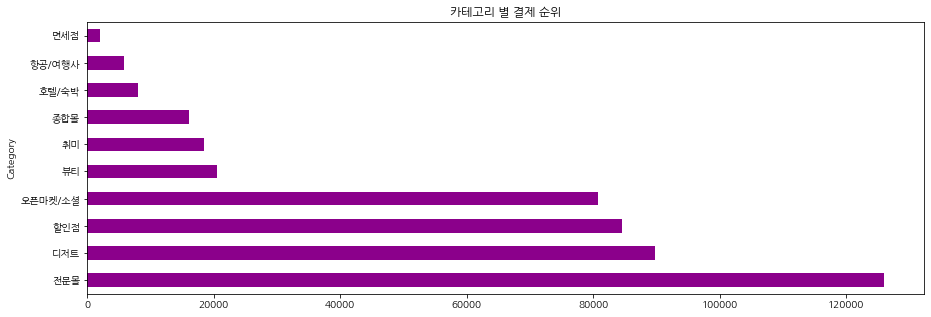

In [426]:
cat_summary.plot(kind='barh', figsize=(15,5), title="카테고리 별 결제 순위", color='darkmagenta')
plt.show()

##### 1.1. 2019년 카테고리별 결제 순위 

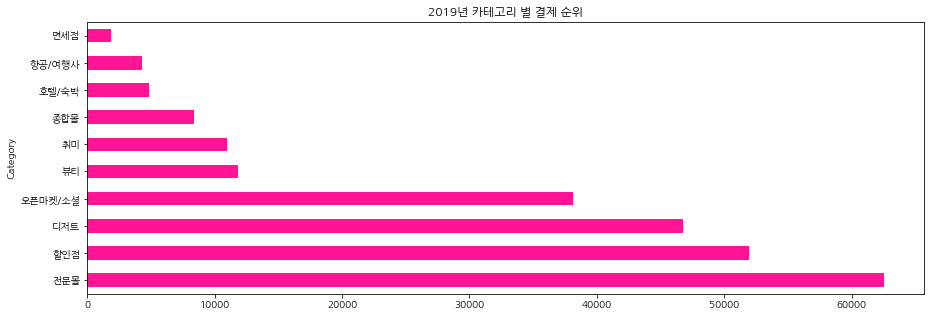

In [427]:
cat_summary_2019=data_2019.groupby('Category').count()["연령대"].sort_values(ascending=False)
cat_summary_2019.plot(kind='barh', figsize=(15,5), title="2019년 카테고리 별 결제 순위", color='deeppink')
plt.show()

##### 1.2. 2020년 카테고리별 결제 순위 

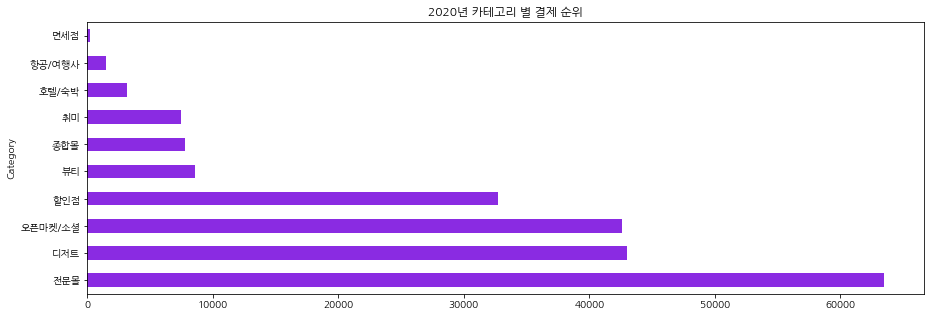

In [428]:
cat_summary_2020=data_2020.groupby('Category').count()["연령대"].sort_values(ascending=False)
cat_summary_2020.plot(kind='barh', figsize=(15,5), title="2020년 카테고리 별 결제 순위", color='blueviolet')
plt.show()

#### 2. 성별 결제 

##### 2.1. 2019년 성별 결제 

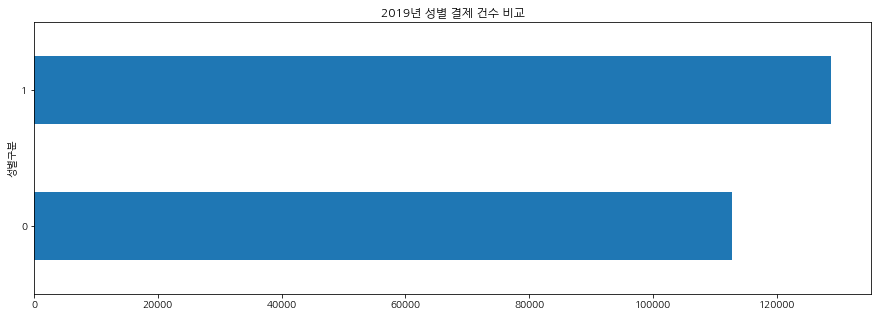

In [429]:
# 0: 남성, 1: 여성
gender_2019= data_2019.groupby('성별구분').count()['연령대'].sort_values()
gender_2019.plot(kind='barh', figsize=(15,5), title="2019년 성별 결제 건수 비교")
plt.show()

##### 2.2. 2020년 성별 결제 

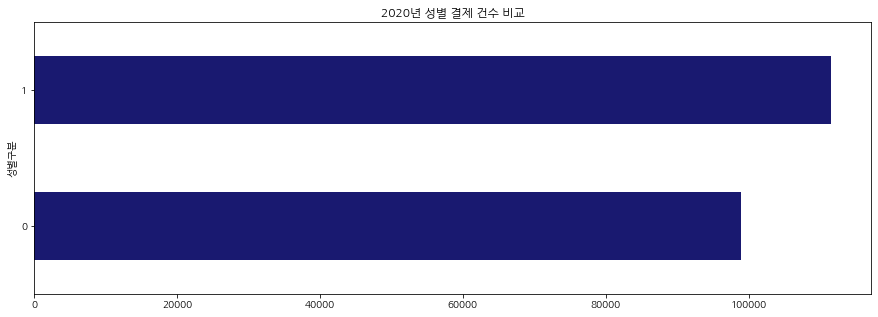

In [430]:
gender_2020= data_2020.groupby('성별구분').count()['연령대'].sort_values()
gender_2020.plot(kind='barh', figsize=(15,5), title="2020년 성별 결제 건수 비교", color='midnightblue')
plt.show()

##### 2.3. 카테고리별 여성 건수

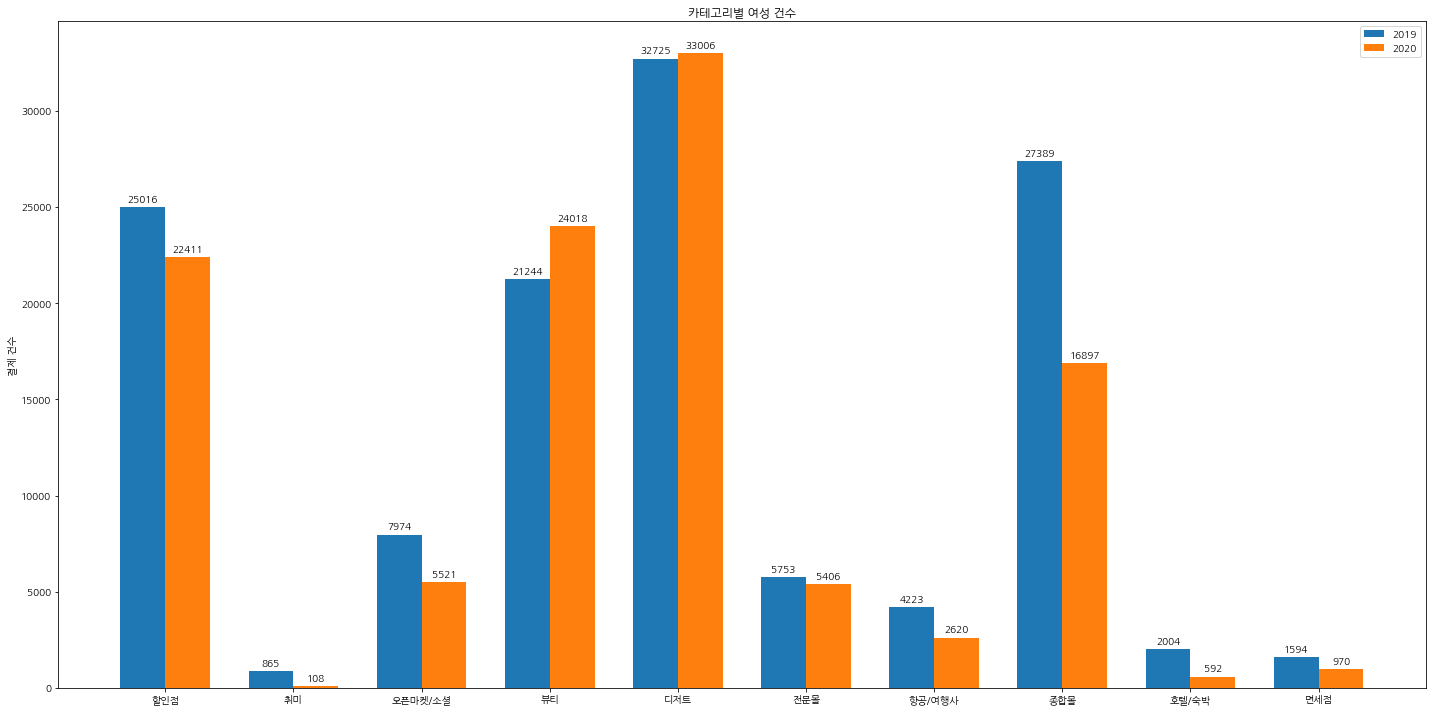

In [508]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = data['Category'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, female_2019, width, label='2019')
rects2 = ax.bar(x + width/2, female_2020, width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('결제 건수')
ax.set_title('카테고리별 여성 건수')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

##### 2.4. 카테고리별 남성 건수

In [497]:
data_2019[data_2019['성별구분']==0].groupby("Category")['성별구분'].value_counts()

Category  성별구분
디저트       0       21722
면세점       0        1008
뷰티        0        3890
오픈마켓/소셜   0       16865
전문몰       0       29841
종합몰       0        2611
취미        0        6753
할인점       0       24548
항공/여행사    0        2293
호텔/숙박     0        3252
Name: 성별구분, dtype: int64

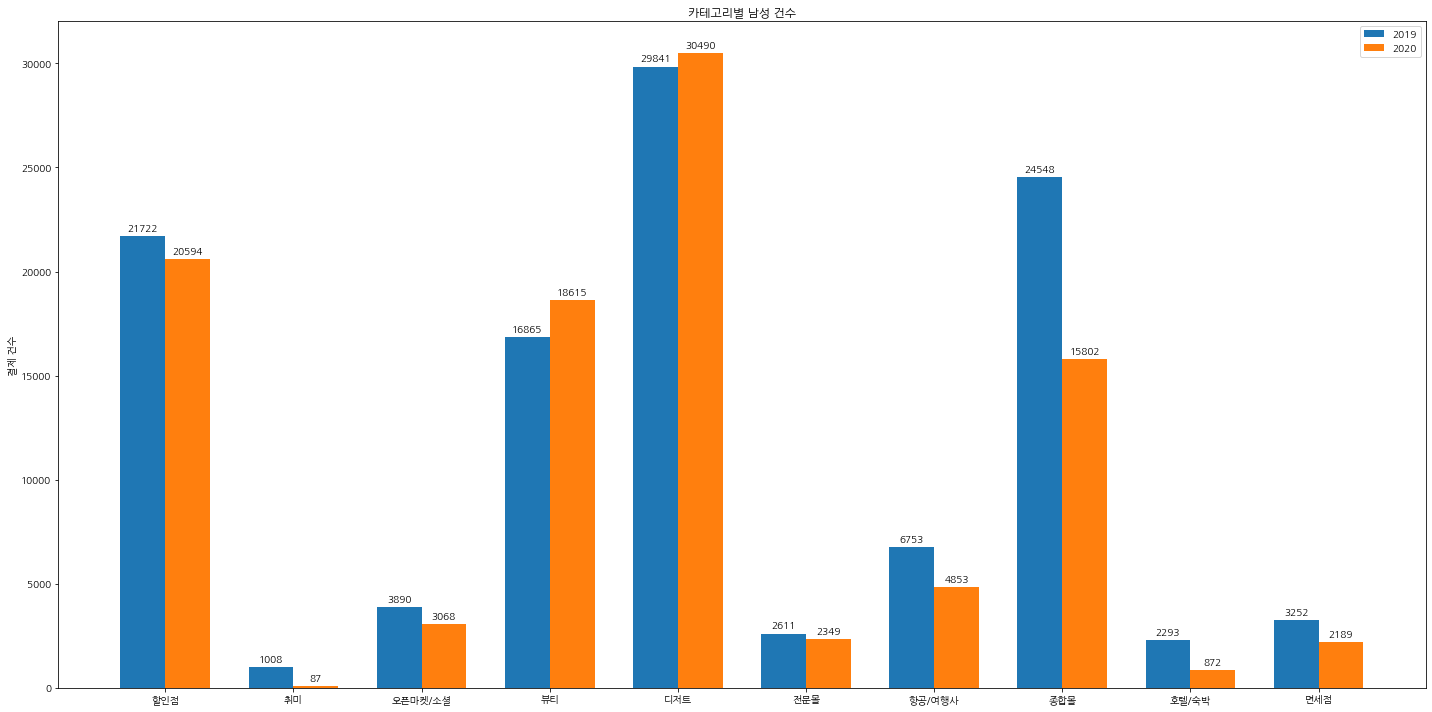

In [509]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = data['Category'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_2019, width, label='2019')
rects2 = ax.bar(x + width/2, male_2020, width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('결제 건수')
ax.set_title('카테고리별 남성 건수')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### 3. 연령대

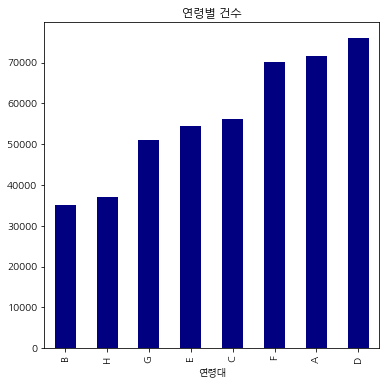

In [435]:
age= data.groupby("연령대").count()['Category'].sort_values()

age.plot(kind='bar', stacked=True, figsize= (6,6), color='navy', title="연령별 건수")

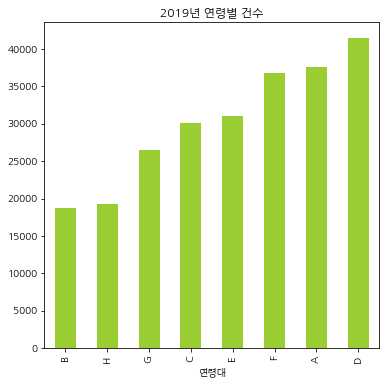

In [436]:
age_2019= data_2019.groupby("연령대").count()['Category'].sort_values()

age_2019.plot(kind='bar', stacked=True, figsize= (6,6), color='yellowgreen', title="2019년 연령별 건수")

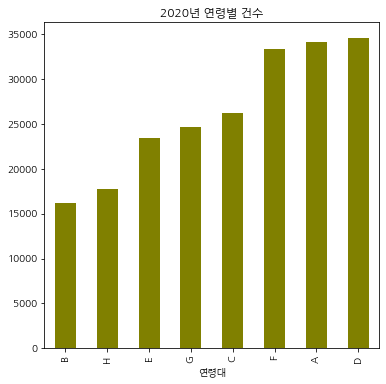

In [437]:
age_2020= data_2020.groupby("연령대").count()['Category'].sort_values()

age_2020.plot(kind='bar', stacked=True, figsize= (6,6), color='olive', title="2020년 연령별 건수")

##### 연령 예측하기

In [450]:
data.columns

Index(['YM', 'Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어',
       '중고생자녀스코어', '대학생자녀스코어', '전업주부스코어'],
      dtype='object')

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


In [452]:
for i in columns_to_change:
  data[i]=data[i].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  int64 
 5   유아자녀스코어    452038 non-null  int64 
 6   초등학생자녀스코어  452038 non-null  int64 
 7   중고생자녀스코어   452038 non-null  int64 
 8   대학생자녀스코어   452038 non-null  int64 
 9   전업주부스코어    452038 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ MB


- 결혼 여부와 자녀 나이대를 고려해 연령대를 특정하고자 한다. 
- 각각의 스코어를 곱해 새로운 열을 추가하고, 스코어가 높은 연령대 군을 추린다.

In [453]:
data['기혼대학생']=(data['기혼스코어']*data['대학생자녀스코어'])
data['기혼중고생']=(data['기혼스코어']*data['중고생자녀스코어'])
data['기혼초등생']=(data['기혼스코어']*data['초등학생자녀스코어'])
data['기혼유아']=(data['기혼스코어']*data['유아자녀스코어'])

In [454]:
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아
0,202005,할인점,0,F,3,1,3,2,1,1,3,6,9,3
1,202005,취미,0,B,3,1,2,2,1,1,3,6,6,3
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2,2,4,4,4
3,202005,뷰티,0,D,2,2,2,2,1,1,2,4,4,4
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1,6,6,6,3


In [455]:
data.groupby('연령대')['기혼대학생'].value_counts()

연령대  기혼대학생
A    3        56970
     6        14658
     9           12
B    3        19906
     6        14389
     9          730
C    2        46063
     3         9859
     1          348
D    2        39297
     3        36875
E    1        30234
     2        22008
     3         2332
F    6        34932
     3        34415
     9          804
G    6        31275
     3        17612
     9         2208
H    3        32826
     6         4256
     9           29
Name: 기혼대학생, dtype: int64

In [456]:
data.groupby('기혼대학생')['연령대'].value_counts()

기혼대학생  연령대
1      E      30234
       C        348
2      C      46063
       D      39297
       E      22008
3      A      56970
       D      36875
       F      34415
       H      32826
       B      19906
       G      17612
       C       9859
       E       2332
6      F      34932
       G      31275
       A      14658
       B      14389
       H       4256
9      G       2208
       F        804
       B        730
       H         29
       A         12
Name: 연령대, dtype: int64

- 대학생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 G, F, B 이다

In [457]:
data.groupby('기혼중고생')['연령대'].value_counts()

기혼중고생  연령대
1      E      30234
       C        348
2      C      46063
       E      22008
       D        111
3      H      37111
       C       9859
       E       2332
       B       1184
       G        277
       F        226
       A        163
       D          6
4      D      38814
6      A      58294
       F      56923
       G      48735
       D      34562
       B      33758
9      A      13183
       F      13002
       D       2679
       G       2083
       B         83
Name: 연령대, dtype: int64

- 중고생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 A,F,D 이다

In [458]:
data.groupby('기혼초등생')['연령대'].value_counts()

기혼초등생  연령대
1      E      30234
       C         39
2      E      22008
       D       9399
       C       4461
3      H      37111
       A      29189
       D      16502
       F      14745
       G       3211
       B       2359
       E       2332
       C       2283
4      C      24818
       D      20120
6      F      36720
       G      25763
       A      24616
       C      21842
       D      20269
       B      12353
9      G      22121
       B      20313
       F      18686
       A      17835
       D       9882
       C       2827
Name: 연령대, dtype: int64

초등학생 자녀를 둔 기혼자 중 높은 점수를 보여주는 그룹은 순서대로 G, B, F 이다

In [459]:
data.groupby('기혼유아')['연령대'].value_counts()

기혼유아  연령대
1     E      17239
      C         74
2     E      14990
      C       1384
      D       1161
3     F      63371
      G      51095
      H      37111
      B      35025
      A      24402
      E        585
      D        160
4     C      37437
      D      34163
      E      17936
6     A      44689
      D      31299
      C      13050
      F       6771
      E       3483
9     D       9389
      C       4325
      A       2549
      E        341
      F          9
Name: 연령대, dtype: int64

In [460]:
data.groupby('기혼스코어')['연령대'].value_counts()

기혼스코어  연령대
1      E      30234
       C        348
2      C      46063
       D      39297
       E      22008
3      A      71640
       F      70151
       G      51095
       H      37111
       D      36875
       B      35025
       C       9859
       E       2332
Name: 연령대, dtype: int64

- 위 자료를 토대로 임의 배정 했습니다.
  + 20-24 : E
  + 25-29 : C
  + 30-34 : D
  + 35-39 : B
  + 40-44 : A
  + 45-49 : F
  + 50-54 : G
  + 55-59 : H

- 추론된 나이대로 연령대 mapping 

In [461]:
Ages={"A":"40-44","B":"35-39","C":"25-29","D":"30-44","E":"20-24","F":"45-49","G":"50-54","H":"55-59"}
data['Age']=data['연령대'].map(Ages)

#### 모자이크 플롯

In [462]:
import numpy as np
import pandas as pd

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import seaborn as sns



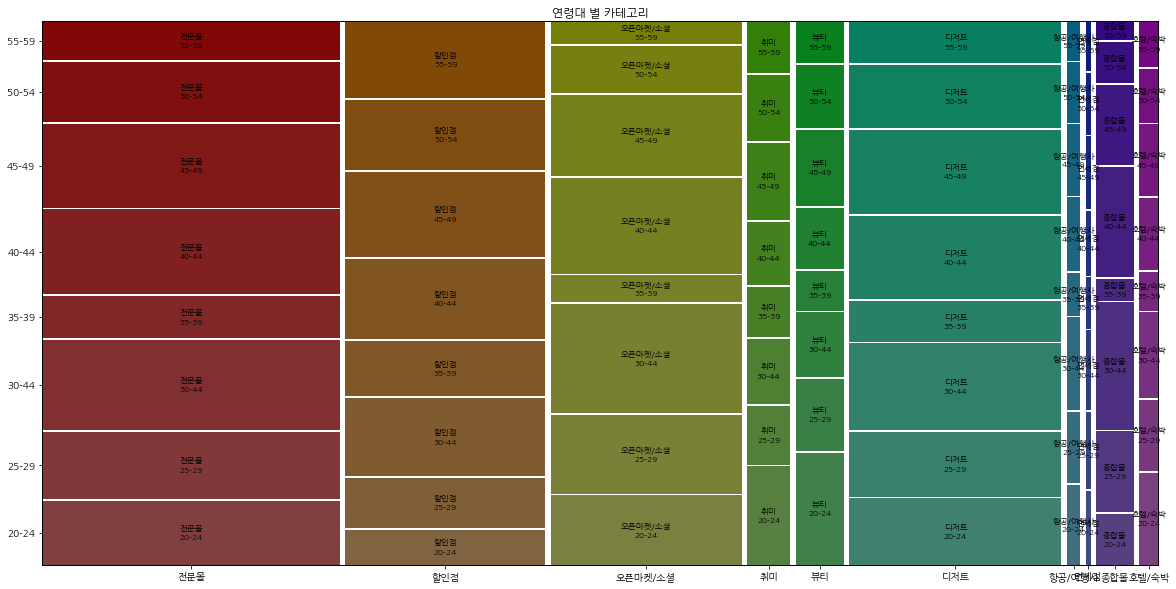

In [463]:
mosaic(data.sort_values('Age'), ['Category', 'Age'], 
      title='연령대 별 카테고리')
plt.show()

In [464]:
data_2019= data[(data['YM']==201905) | (data['YM']==201904)]
data_2020= data[(data['YM']==202005) | (data['YM']==202004)]

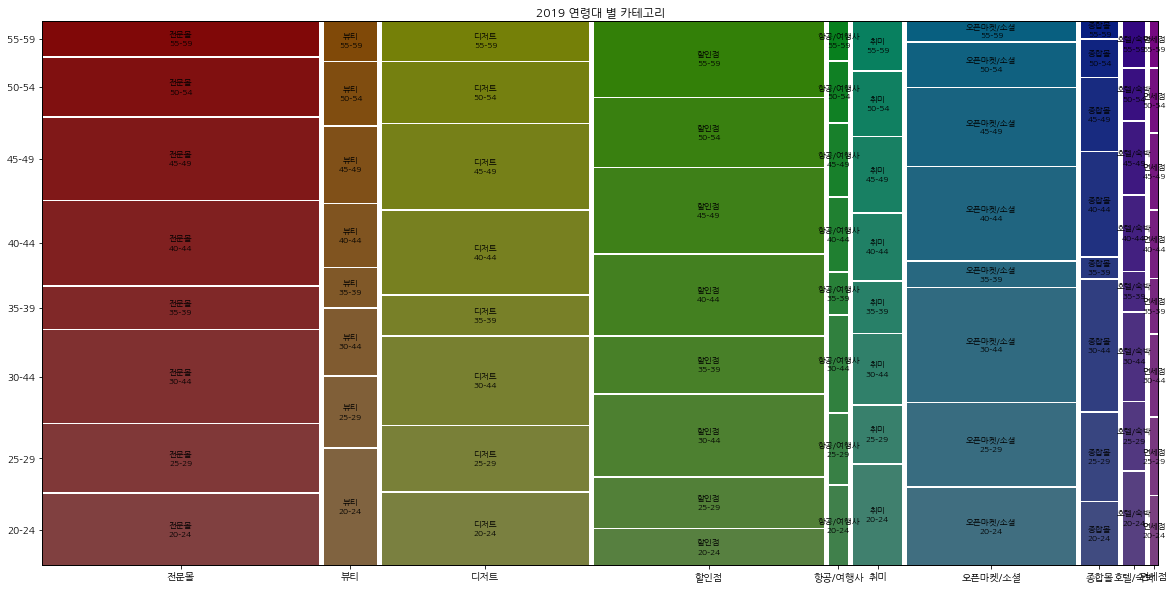

In [465]:
mosaic(data_2019.sort_values('Age'), ['Category', 'Age'], 
      title='2019 연령대 별 카테고리')
plt.show()

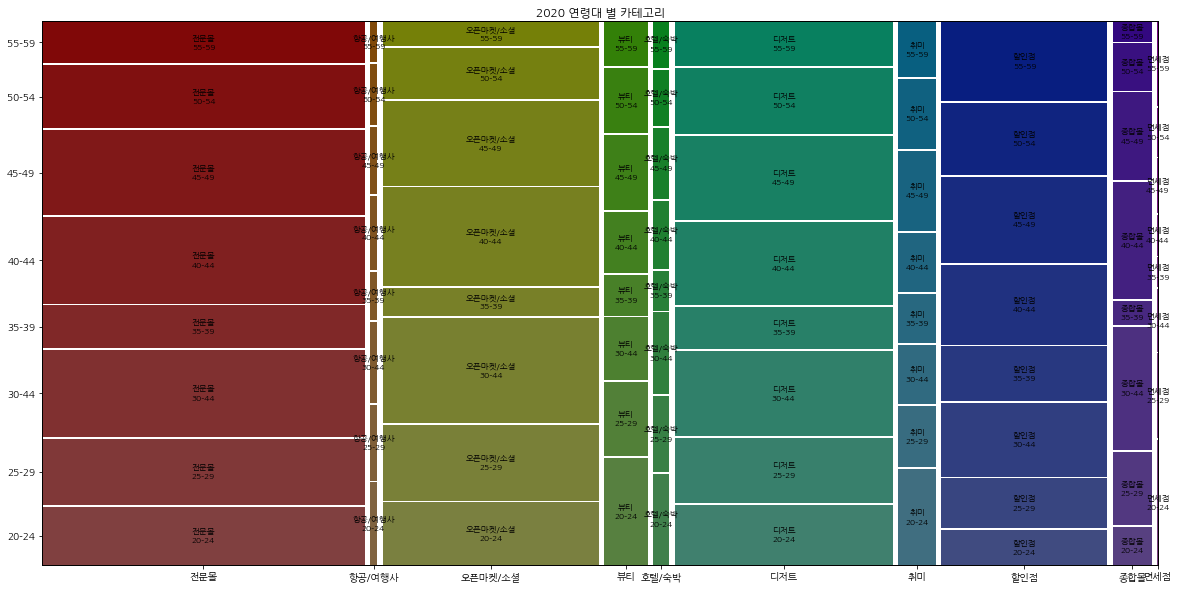

In [466]:
mosaic(data_2020.sort_values('Age'), ['Category', 'Age'], 
      title='2020 연령대 별 카테고리')
plt.show()

#### 20대 소비 패턴

In [467]:
data['YM']=data['YM'].astype('str')
data['Y']=data['YM'].str.extract('(\d{4})')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
0,202005,할인점,0,F,3,1,3,2,1,1,3,6,9,3,45-49,2020
1,202005,취미,0,B,3,1,2,2,1,1,3,6,6,3,35-39,2020
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2,2,4,4,4,30-44,2020
3,202005,뷰티,0,D,2,2,2,2,1,1,2,4,4,4,30-44,2020
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1,6,6,6,3,50-54,2020


In [468]:
twenties = data[(data['연령대']=="E")|(data['연령대']=="C")]

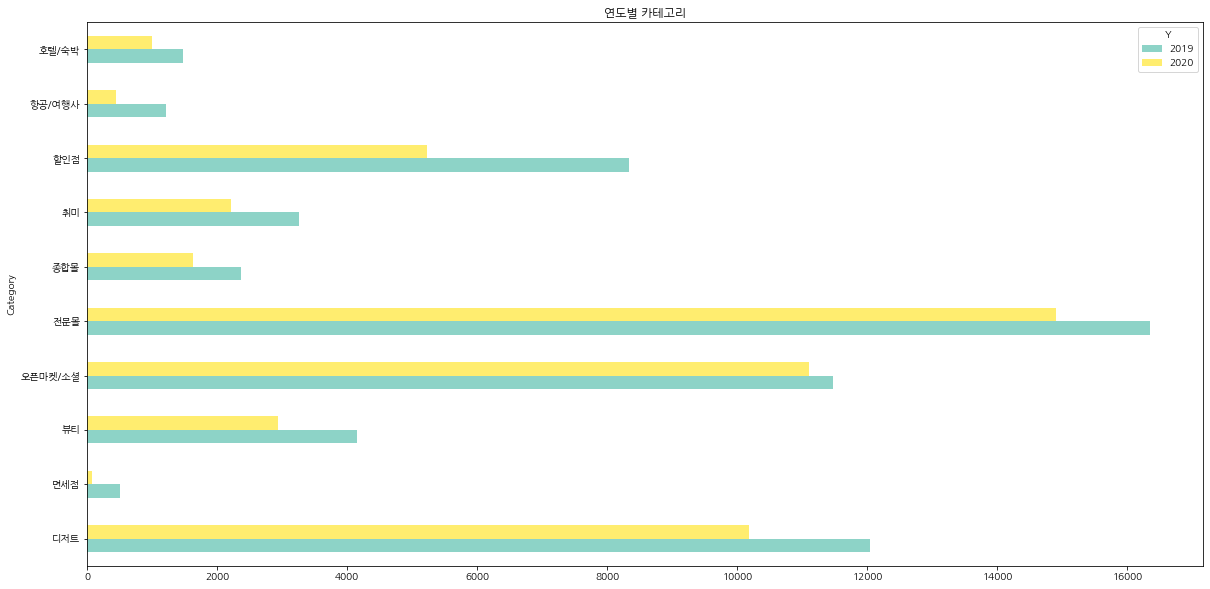

In [469]:
Y_twenties=twenties.groupby(['Category','Y'])['연령대'].count().unstack('Y')
Y_twenties.plot(kind='barh', stacked=False, colormap='Set3', title="연도별 카테고리")

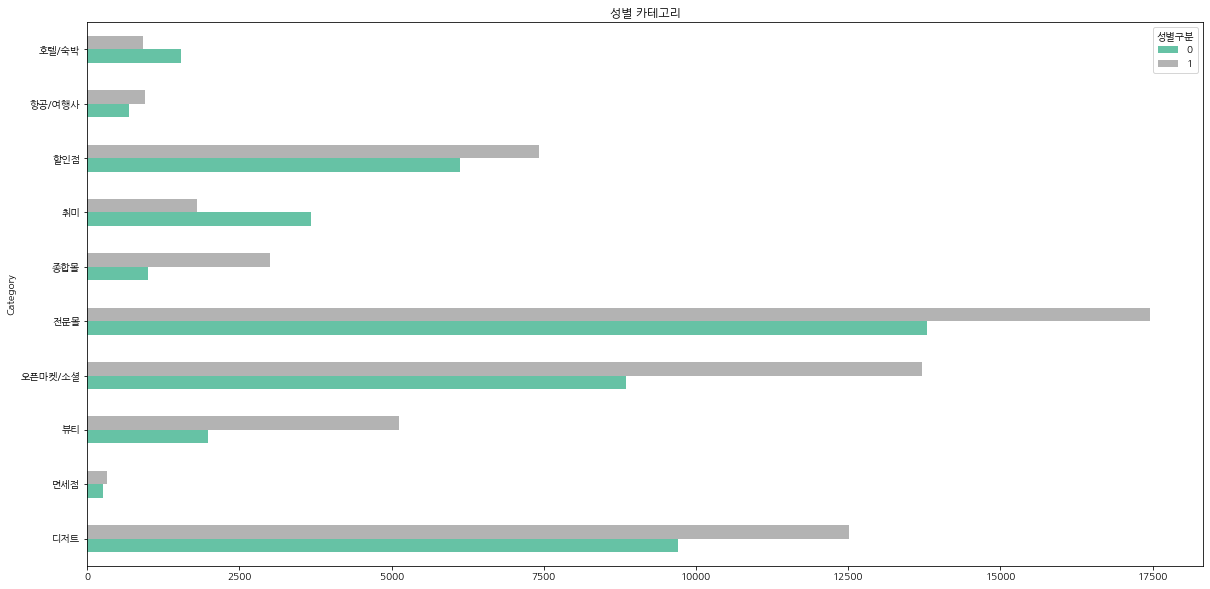

In [470]:
G_twenties=twenties.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')
G_twenties.plot(kind='barh', stacked=False, colormap='Set2', title="성별 카테고리")

#### 연령대 D 소비 패턴

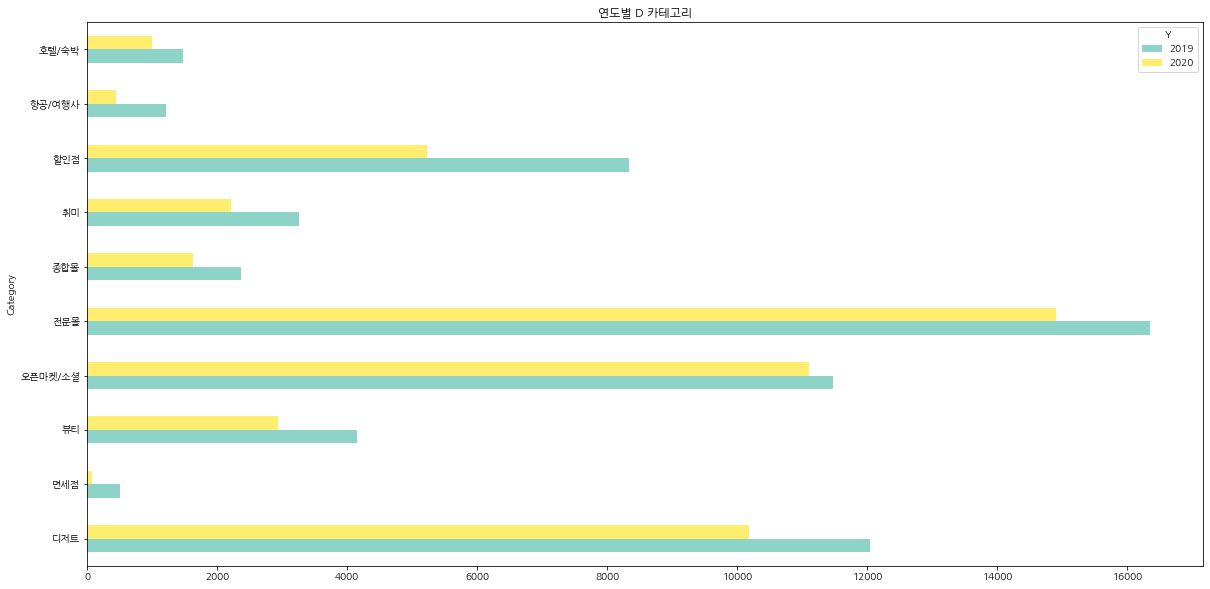

In [471]:
Age_D = data[(data['연령대']=="D")]
Age_D=twenties.groupby(['Category','Y'])['연령대'].count().unstack('Y')
Age_D.plot(kind='barh', stacked=False, colormap='Set3', title="연도별 D 카테고리")

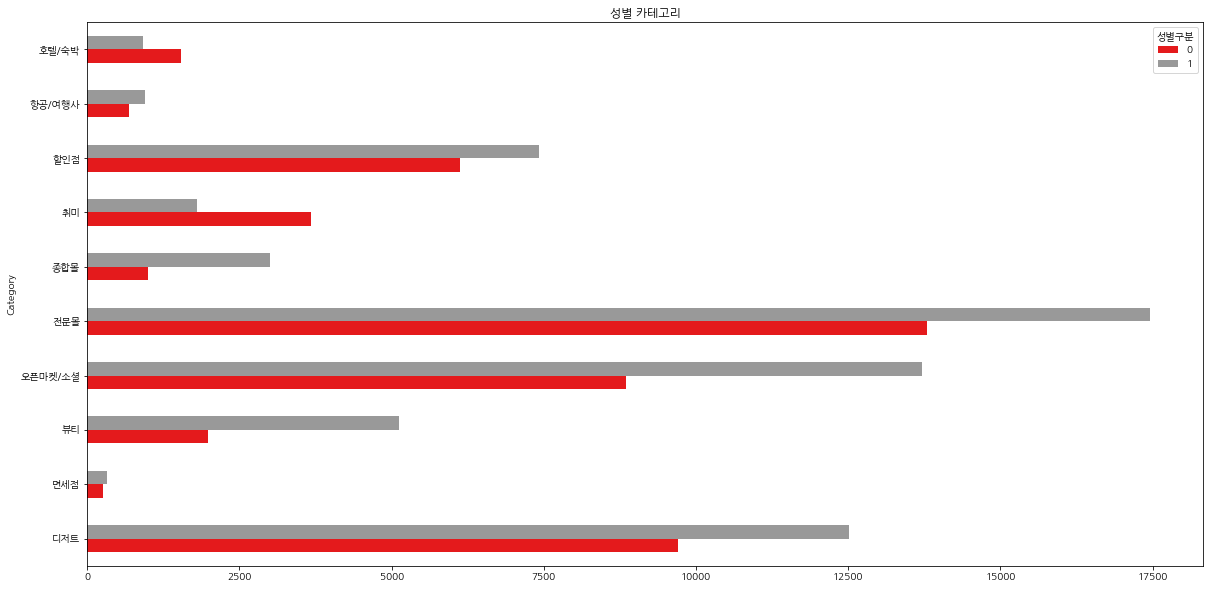

In [472]:
Gender_D = data[(data['연령대']=="D")]
Gender_D=twenties.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')
Gender_D.plot(kind='barh', stacked=False, colormap='Set1', title="성별 카테고리")

### (5) 피벗 테이블 만들기 

In [474]:
new_data2019 = data_2019.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data2019

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,6363,5682,7735,3438,7325,7445,5295,3455
면세점,242,270,288,188,237,263,224,161
뷰티,2592,1564,1490,861,1390,1699,1394,874
오픈마켓/소셜,5535,5932,8118,1802,6633,5546,3157,1386
전문몰,8347,8004,10858,4958,9818,9607,6873,4101
종합몰,986,1382,2068,313,1636,1138,579,262
취미,2076,1179,1438,1054,1361,1546,1312,1010
할인점,3476,4856,7952,5493,7862,8285,6654,7359
항공/여행사,640,566,782,330,596,585,485,313


In [475]:
new_data2020 = data_2020.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data2020

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,4888,5287,6871,3419,6761,6815,5361,3603
면세점,46,31,23,11,15,20,18,31
뷰티,1735,1203,1008,658,987,1222,1048,728
오픈마켓/소셜,5034,6064,8446,2272,7932,6765,4108,2012
전문몰,6918,7981,10414,5097,10331,10224,7507,5024
종합몰,555,1076,1794,352,1714,1281,688,295
취미,1347,869,834,685,835,1136,980,787
할인점,2178,3043,4538,3372,4919,5306,4439,4904
항공/여행사,228,208,224,134,203,186,168,113


In [ ]:
from google.colab import files

new_data2019.to_csv('new_data2019.csv')
files.download('new_data2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [480]:
data_2004= data[data['YM']=="202004"]
data_2004.head()


,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
109094,202004,오픈마켓/소셜,1,D,2,2,1,2,1,1,2,4,2,4,30-44,2020
109095,202004,디저트,1,B,3,1,3,2,2,2,6,6,9,3,35-39,2020
109096,202004,전문몰,0,E,1,1,1,1,1,1,1,1,1,1,20-24,2020
109097,202004,전문몰,1,D,2,2,2,2,1,2,2,4,4,4,30-44,2020
109098,202004,오픈마켓/소셜,1,E,2,3,1,1,1,2,2,2,2,6,20-24,2020


In [481]:
data_2005= data[data['YM']=="202005"]
data_2005.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
0,202005,할인점,0,F,3,1,3,2,1,1,3,6,9,3,45-49,2020
1,202005,취미,0,B,3,1,2,2,1,1,3,6,6,3,35-39,2020
2,202005,오픈마켓/소셜,1,D,2,2,2,2,1,2,2,4,4,4,30-44,2020
3,202005,뷰티,0,D,2,2,2,2,1,1,2,4,4,4,30-44,2020
4,202005,오픈마켓/소셜,0,G,3,1,2,2,2,1,6,6,6,3,50-54,2020


In [482]:
data_1904= data[data['YM']=="201904"]
data_1904.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
331919,201904,할인점,0,H,3,1,1,1,1,1,3,3,3,3,55-59,2019
331920,201904,할인점,0,E,1,1,1,1,1,1,1,1,1,1,20-24,2019
331921,201904,할인점,1,A,3,1,2,2,1,2,3,6,6,3,40-44,2019
331922,201904,전문몰,1,D,3,2,3,2,1,3,3,6,9,6,30-44,2019
331923,201904,취미,0,F,3,2,3,2,2,1,6,6,9,6,45-49,2019


In [483]:
data_1905= data[data['YM']=="201905"]
data_1905.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,기혼대학생,기혼중고생,기혼초등생,기혼유아,Age,Y
210468,201905,전문몰,1,E,1,1,1,1,1,2,1,1,1,1,20-24,2019
210469,201905,전문몰,1,E,2,2,1,1,1,2,2,2,2,4,20-24,2019
210470,201905,할인점,1,F,3,1,2,2,2,2,6,6,6,3,45-49,2019
210471,201905,전문몰,0,G,3,1,2,2,2,1,6,6,6,3,50-54,2019
210472,201905,전문몰,1,H,3,1,1,1,2,2,6,3,3,3,55-59,2019


In [484]:
new_data_2004 = data_2004.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_2004

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,2317.0,2510.0,3270.0,1561.0,3170.0,3272.0,2507.0,1652.0
면세점,12.0,7.0,7.0,3.0,NaN,7.0,6.0,14.0
뷰티,814.0,545.0,450.0,318.0,433.0,581.0,475.0,362.0
오픈마켓/소셜,2517.0,2960.0,4142.0,1130.0,3891.0,3331.0,1954.0,984.0
전문몰,3383.0,3989.0,5216.0,2483.0,5057.0,4900.0,3685.0,2426.0
종합몰,293.0,592.0,916.0,188.0,909.0,658.0,362.0,155.0
취미,600.0,390.0,354.0,303.0,381.0,513.0,452.0,348.0
할인점,1140.0,1402.0,2084.0,1620.0,2311.0,2571.0,2229.0,2399.0
항공/여행사,98.0,96.0,96.0,59.0,66.0,82.0,47.0,45.0


In [485]:
new_data_2005 = data_2005.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_2005

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,2571,2777,3601,1858,3591,3543,2854,1951
면세점,34,24,16,8,15,13,12,17
뷰티,921,658,558,340,554,641,573,366
오픈마켓/소셜,2517,3104,4304,1142,4041,3434,2154,1028
전문몰,3535,3992,5198,2614,5274,5324,3822,2598
종합몰,262,484,878,164,805,623,326,140
취미,747,479,480,382,454,623,528,439
할인점,1038,1641,2454,1752,2608,2735,2210,2505
항공/여행사,130,112,128,75,137,104,121,68


In [486]:
new_data_1904 = data_1904.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_1904

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,3130,2799,3802,1678,3574,3669,2534,1732
면세점,135,140,143,94,106,130,111,88
뷰티,1276,736,733,443,657,822,633,434
오픈마켓/소셜,2672,2951,4016,879,3242,2739,1584,683
전문몰,4125,3992,5376,2469,4812,4819,3370,1948
종합몰,499,720,1055,148,802,559,275,131
취미,1025,579,728,539,680,761,656,501
할인점,1686,2518,4036,2867,4068,4285,3426,3835
항공/여행사,339,292,372,161,298,280,252,138


In [487]:
new_data_1905 = data_1905.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_1905

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,3233,2883,3933,1760,3751,3776,2761,1723
면세점,107,130,145,94,131,133,113,73
뷰티,1316,828,757,418,733,877,761,440
오픈마켓/소셜,2863,2981,4102,923,3391,2807,1573,703
전문몰,4222,4012,5482,2489,5006,4788,3503,2153
종합몰,487,662,1013,165,834,579,304,131
취미,1051,600,710,515,681,785,656,509
할인점,1790,2338,3916,2626,3794,4000,3228,3524
항공/여행사,301,274,410,169,298,305,233,175


### (6) 만든 데이터 프레임 CSV 파일로 내려받기

In [ ]:
from google.colab import files

data.to_csv('new_data.csv')
files.download('new_data.csv')